In [1]:
import pandas as pd
import  numpy  as  np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from pandas_ml import ConfusionMatrix
from scipy.fftpack import fft
from geopandas import GeoDataFrame
import geopandas
from shapely.geometry import Point
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [2]:
raw_data_file_name= "Data_to_Clustered/dilum_sir_route.json"
raw_data = pd.read_json(raw_data_file_name)
raw_data.head(5)

,acceY,anomaly,lat,lon,time
0,10.014616,A,6.761253,79.947881,1538098877180
1,10.115843,A,6.758759,79.948375,1538098907538
2,10.028455,A,6.758759,79.948375,1538098908240
3,10.260644,A,6.758699,79.948589,1538098910039
4,10.001304,A,6.758699,79.948589,1538098910139


In [3]:
raw_data.shape

(1151, 5)

In [4]:
#features = ['lat','lon',]
#coordinates = raw_data[features]
#coordinates.head()

In [5]:
#coordinates.shape

In [6]:
#coordinates['coordinates'] = list(zip(coordinates.lon, coordinates.lat))

In [7]:
#coordinates.head()

In [8]:
#coordinates['coordinates'] = coordinates['coordinates'].apply(Point)

In [9]:
#coordinates.head()

In [10]:
#gdf = GeoDataFrame(coordinates, geometry='coordinates')
#gdf.plot()

In [11]:
#print(gdf.head())

In [12]:
#world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
#ax = world[world.continent == 'Asia'].plot(
    #color='white', edgecolor='black')

# We can now plot our GeoDataFrame.
#gdf.plot(ax=ax, color='red')

#plt.show()

In [13]:
#gdf.plot()

In [14]:
#kms_per_radian = 6371.0088
#epsilon = 0.01 / kms_per_radian
#print(epsilon)

In [15]:
kms_per_radian = 6371.0088
epsilon = 0.005 / kms_per_radian
coords = raw_data.as_matrix(columns=['lat', 'lon'])
#print(coords)

In [16]:
db = DBSCAN(eps = epsilon, min_samples=7, algorithm='ball_tree',metric='haversine').fit(np.radians(coords))

In [17]:
cluster_labels = db.labels_
n_clusters = len(set(cluster_labels))

In [18]:
cluster_labels 

array([-1, -1, -1, ..., -1, 27, -1], dtype=int64)

In [19]:
db

DBSCAN(algorithm='ball_tree', eps=7.848050688613082e-07, leaf_size=30,
    metric='haversine', metric_params=None, min_samples=7, n_jobs=1,
    p=None)

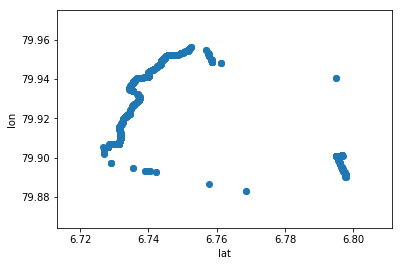

In [20]:
x = raw_data['lat']
y = raw_data['lon']

plt.scatter(x,y)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

In [21]:
db.core_sample_indices_

array([  22,   23,   24,   25,   26,   30,   31,   32,   33,   34,   35,
         36,   37,   56,   76,   77,   78,   79,   86,   87,   88,   91,
         92,   93,  105,  106,  107,  112,  113,  114,  115,  116,  121,
        122,  123,  155,  156,  157,  174,  180,  181,  182,  184,  226,
        227,  274,  275,  276,  277,  278,  280,  281,  282,  283,  284,
        285,  286,  287,  288,  293,  294,  295,  296,  301,  302,  303,
        304,  305,  306,  307,  308,  312,  313,  320,  321,  331,  332,
        333,  334,  335,  336,  345,  346,  347,  348,  349,  350,  351,
        381,  382,  383,  390,  391,  392,  393,  394,  395,  396,  397,
        420,  421,  422,  423,  424,  428,  429,  430,  431,  432,  433,
        434,  435,  454,  474,  475,  476,  477,  484,  485,  486,  489,
        490,  491,  503,  504,  505,  510,  511,  512,  513,  514,  519,
        520,  521,  553,  554,  555,  572,  578,  579,  580,  582,  624,
        625,  672,  673,  674,  675,  676,  678,  6

In [22]:
result = raw_data
result['cluster'] = db.labels_
result = result.iloc[db.core_sample_indices_]
result.head()

,acceY,anomaly,lat,lon,time,cluster
22,10.049045,A,6.751611,79.954563,1538099035718,0
23,10.021320,A,6.751611,79.954563,1538099036418,0
24,10.019883,A,6.751562,79.954525,1538099037119,1
25,10.029412,A,6.751562,79.954525,1538099037320,1
26,10.089938,A,6.751562,79.954525,1538099037421,1


In [23]:
result.shape

(287, 6)

In [24]:
result['cluster'].describe()

count    287.000000
mean      13.362369
std        6.898949
min        0.000000
25%        8.000000
50%       15.000000
75%       18.000000
max       27.000000
Name: cluster, dtype: float64

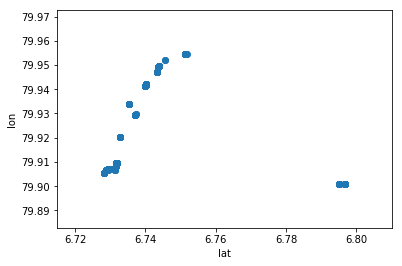

In [25]:
x = result['lat']
y = result['lon']
c = result['cluster']

#plt.scatter(x,y,c)
plt.scatter(x,y,label=c)
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

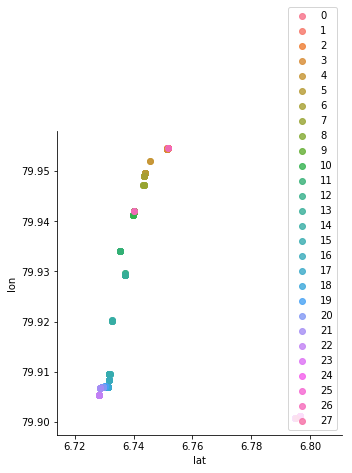

In [26]:
import seaborn as sns
#df = sns.load_dataset('iris')
 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="lat", y="lon", data=result, fit_reg=False, hue='cluster', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')


In [27]:
result.to_json("Clustered_Data/dilum_sir_route.json", orient='records')